In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import astropy.units as unit
import astropy.constants as cons
import matplotlib as mpl
mpl.rcParams['font.size']=16

In [140]:
def f(r):
    x,y,xdot,ydot=r[2],r[3],x2(r[2],r[3]),y2(r[2], r[3])
    return np.array([x,y,xdot,ydot])

def trajectory(v0, theta, planet):
    if (planet=='Earth' or planet=='earth'):
        g=9.8
        rho=1.22
    elif (planet=='Mars' or planet=='mars'):
        g=3.71
        rho=0.20
    else: 
        print('Planets currently supported are Earth and Mars. Please enter one of those two for planet.')
        return
    
    m=1.
    R=.08
    theta=np.deg2rad(theta)
    x0,x1,y0,y1=0.,v0*np.cos(theta), 0, v0*np.sin(theta)
    xs=[]
    ys=[]
    C=0.47
    H=.01
    t0=0
    delta=1e-4

    y2=lambda x1,y1: -g-(np.pi*R**2*rho*C*y1*np.sqrt(x1**2+y1**2))/(2*m)
    x2=lambda x1,y1: -(np.pi*R**2*rho*C*x1*np.sqrt(x1**2+y1**2))/(2*m)



    vec=np.array([x0,y0,x1,y1])
    y=y0
    while y>-1e-6:
        xs.append(vec[0])
        ys.append(vec[1])
        n=1

        r1=vec+0.5*H*f(vec)
        r2=vec+H*f(r1)

        R1=np.empty([1,4], float)
        R1[0]=0.5*(r1+r2+0.5*H*f(r2))

        error=2*H*delta
        while error>H*delta:
            n+=1
            h=H/n

            r1=vec+0.5*h*f(vec)
            r2=vec+h*f(r1)   
            for i in range(n-1):
                r1+=h*f(r2)
                r2+=h*f(r1)

            R2=R1
            R1=np.empty([n,4],float)
            R1[0]=0.5*(r1+r2+0.5*h*f(r2))

            for m in range(1,n):
                epsilon=(R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1.)
                R1[m]=R1[m-1]+epsilon
            error=np.abs(epsilon[0])
        vec=R1[n-1]
        y=ys[-1]
    return xs, ys


In [141]:
xs

[0.0,
 0.86353928131048396,
 1.7221457889963538,
 2.5758779502819844,
 3.4247931721213534,
 4.2689478647616896,
 5.1083974646302082,
 5.9431964565671453,
 6.7733983954273631,
 7.5990559270719142,
 8.4202208087701269,
 9.2369439290319537,
 10.049275326889568,
 10.857264210646447,
 11.66095897611153,
 12.460407224335254,
 13.255655778863769,
 14.046750702526916,
 14.833737313775021,
 15.616660202578949,
 16.395563245907368,
 17.170489622794662,
 17.941481829012332,
 18.708581691356468,
 19.471830381563123,
 20.231268429863295,
 20.986935738188592,
 21.738871593038294,
 22.487114678018226,
 23.231703086061465,
 23.972674331340365,
 24.710065360879394,
 25.443912565877643,
 26.174251792749672,
 26.901118353893089,
 27.624547038190926,
 28.344572121256604,
 29.061227375429009,
 29.774546079524985,
 30.484561028356215,
 31.191304542017349,
 31.894808474951915,
 32.59510422480232,
 33.292222741050161,
 33.986194533452682,
 34.677049680281236,
 35.364817836367166,
 36.049528240960569,
 36.7312

Text(0,0.5,'y[m]')

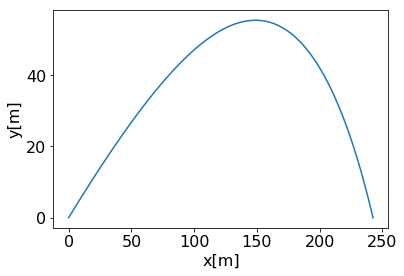

In [142]:
plt.plot(xs,ys)
plt.xlabel('x[m]')
plt.ylabel('y[m]')

In [143]:
ms=np.arange(0.5,100.5,5)
xlists=[]
ylists=[]
for mass in ms:
    R=.08
    v0=100.
    theta=np.pi/6.
    x0,x1,y0,y1=0.,v0*np.cos(theta), 1e-6, v0*np.sin(theta)
    xs=[]
    ys=[]
    rho=1.22
    C=0.47
    g=9.8
    H=.01
    t0=0
    delta=1e-4

    y2=lambda x1,y1: -g-(np.pi*R**2*rho*C*y1*np.sqrt(x1**2+y1**2))/(2*mass)
    x2=lambda x1,y1: -(np.pi*R**2*rho*C*x1*np.sqrt(x1**2+y1**2))/(2*mass)

    def f(r):
        x,y,xdot,ydot=r[2],r[3],x2(r[2],r[3]),y2(r[2], r[3])
        return np.array([x,y,xdot,ydot])

    vec=np.array([x0,y0,x1,y1])
    y=y0
    while y>0:
        xs.append(vec[0])
        ys.append(vec[1])
        n=1

        r1=vec+0.5*H*f(vec)
        r2=vec+H*f(r1)

        R1=np.empty([1,4], float)
        R1[0]=0.5*(r1+r2+0.5*H*f(r2))

        error=2*H*delta
        while error>H*delta:
            n+=1
            h=H/n

            r1=vec+0.5*h*f(vec)
            r2=vec+h*f(r1)   
            for i in range(n-1):
                r1+=h*f(r2)
                r2+=h*f(r1)

            R2=R1
            R1=np.empty([n,4],float)
            R1[0]=0.5*(r1+r2+0.5*h*f(r2))

            for m in range(1,n):
                epsilon=(R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1.)
                R1[m]=R1[m-1]+epsilon
            error=np.abs(epsilon[0])
        vec=R1[n-1]
        y=ys[-1]
    xlists.append(xs)
    ylists.append(ys)

Text(0,0.5,'y[m]')

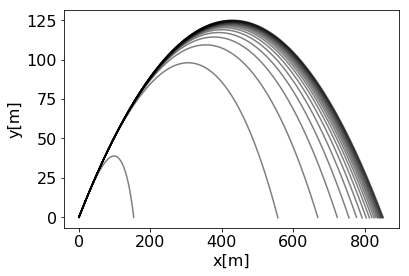

In [145]:
f,ax=plt.subplots(1)
for i in range(len(ms)):
    ax.plot(xlists[i],ylists[i], c='k', alpha=0.5)
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')

In [146]:
ms=np.arange(0.5,100.5,2)
xmaxs=[]
for mass in ms:
    R=.08
    v0=100.
    theta=np.pi/6.
    x0,x1,y0,y1=0.,v0*np.cos(theta), 1e-6, v0*np.sin(theta)
    xs=[]
    ys=[]
    rho=1.22
    C=0.47
    g=9.8
    H=.01
    t0=0
    delta=1e-4

    y2=lambda x1,y1: -g-(np.pi*R**2*rho*C*y1*np.sqrt(x1**2+y1**2))/(2*mass)
    x2=lambda x1,y1: -(np.pi*R**2*rho*C*x1*np.sqrt(x1**2+y1**2))/(2*mass)

    def f(r):
        x,y,xdot,ydot=r[2],r[3],x2(r[2],r[3]),y2(r[2], r[3])
        return np.array([x,y,xdot,ydot])

    vec=np.array([x0,y0,x1,y1])
    y=y0
    while y>0:
        xs.append(vec[0])
        ys.append(vec[1])
        n=1

        r1=vec+0.5*H*f(vec)
        r2=vec+H*f(r1)

        R1=np.empty([1,4], float)
        R1[0]=0.5*(r1+r2+0.5*H*f(r2))

        error=2*H*delta
        while error>H*delta:
            n+=1
            h=H/n

            r1=vec+0.5*h*f(vec)
            r2=vec+h*f(r1)   
            for i in range(n-1):
                r1+=h*f(r2)
                r2+=h*f(r1)

            R2=R1
            R1=np.empty([n,4],float)
            R1[0]=0.5*(r1+r2+0.5*h*f(r2))

            for m in range(1,n):
                epsilon=(R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1.)
                R1[m]=R1[m-1]+epsilon
            error=np.abs(epsilon[0])
        vec=R1[n-1]
        y=ys[-1]
    xmaxs.append(xs[-1])

Text(0,0.5,'Maximum x [m]')

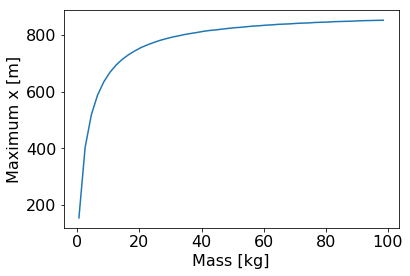

In [147]:
plt.plot(ms, xmaxs)
plt.xlabel('Mass [kg]')
plt.ylabel('Maximum x [m]')